In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import zipfile 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

In [10]:
with zipfile.ZipFile(file = r'Dataset\news.zip', mode='r') as zip:
    zip.extractall(path= r'Dataset')

In [2]:
data = pd.read_csv(r'Dataset\news.csv')

In [3]:
data.shape

(6335, 4)

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
y = data.label

In [6]:
X = data.text

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068,), (1267,), (5068,), (1267,))

In [9]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [10]:
tfidf_train.shape

(5068, 61713)

In [11]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.53%


In [13]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[573,  42],
       [ 40, 612]], dtype=int64)

e:\Cources\deep_learning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


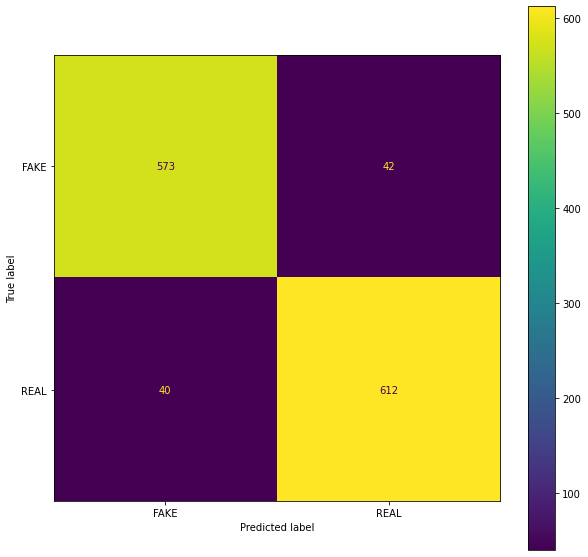

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig , ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(pac, tfidf_test, y_test,ax=ax)
plt.savefig('E:\Projects\Fake news Detection with sklearn\plots\confusion_matrix.png')  
plt.show()